In [4]:
import dwong

In [2]:
import uproot3 as uproot
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import os,sys
import math
from scipy import spatial
import scipy.stats as sp
from scipy.stats import binned_statistic
from scipy.stats import binned_statistic_2d
from matplotlib.backends.backend_pdf import PdfPages
import time

In [16]:
def emcal_eng(x,y,eng):
    x_bins = np.linspace(-150, 150, 50)
    y_bins = np.linspace(-150, 150, 50)
    bin_means = binned_statistic_2d(x, y, eng, statistic='mean',bins=[x_bins, y_bins])
    im = plt.imshow(np.flip(bin_means.statistic.T,0), extent=(-150, 150, -150, 150), aspect='auto')
    plt.colorbar(im, label='Energy deposite')
    #plt.clim(0.,1.)
    plt.xlabel('EMCal x Position')
    plt.ylabel('EMCal y Position')
    

In [9]:
def emcal_eng(x, y, eng):
    x_bins = np.linspace(-150, 150, 50)
    y_bins = np.linspace(-150, 150, 50)
    bin_means = binned_statistic_2d(x, y, eng, statistic='mean', bins=[x_bins, y_bins])
    
    fig, ax = plt.subplots()
    im = ax.imshow(np.flip(bin_means.statistic.T, 0), extent=(-150, 150, -150, 150), aspect='auto')
    plt.colorbar(im, ax=ax, label='Energy Deposit')
    ax.set_xlabel('EMCal x Position')
    ax.set_ylabel('EMCal y Position')
    
    return fig

In [6]:
file='/Users/wongdowling/Desktop/n-tuples/aprime_yongbin/Aee_test_eps9.root'
a,b,c=dwong.emcal_bytuple(file)

In [7]:
len(a)

928

In [11]:
pdf_filename = 'emcal_plots.pdf'
pdf_pages = PdfPages(pdf_filename)
for i in range(len(a)):
    fig = emcal_eng(a[i],b[i],c[i])
    pdf_pages.savefig(fig)
    plt.close(fig)  
pdf_pages.close()

In [ ]:
n=[]
for index, item in enumerate(a):
    print(len(item))
    if len(item)>=180:
        n.append(index)

/Users/wongdowling/opt/anaconda3/envs/dq/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/wongdowling/opt/anaconda3/envs/dq/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/wongdowling/opt/anaconda3/envs/dq/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/wongdowling/opt/anaconda3/envs/dq/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

Elapsed time: 0.1792 seconds


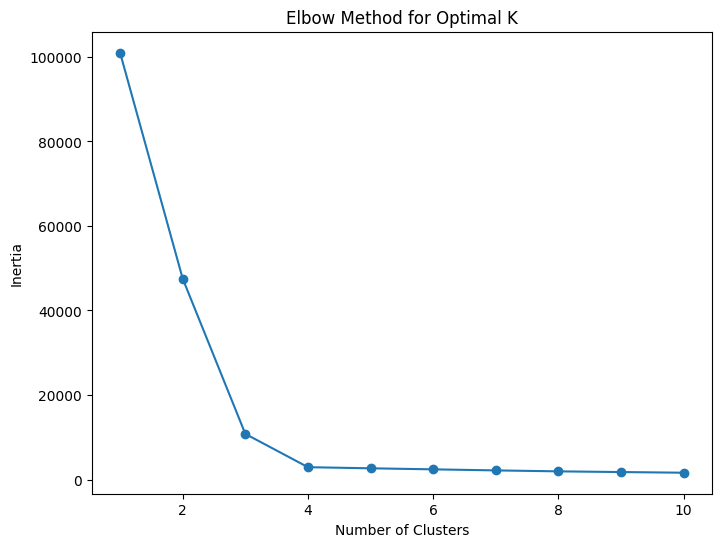

/Users/wongdowling/opt/anaconda3/envs/dq/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


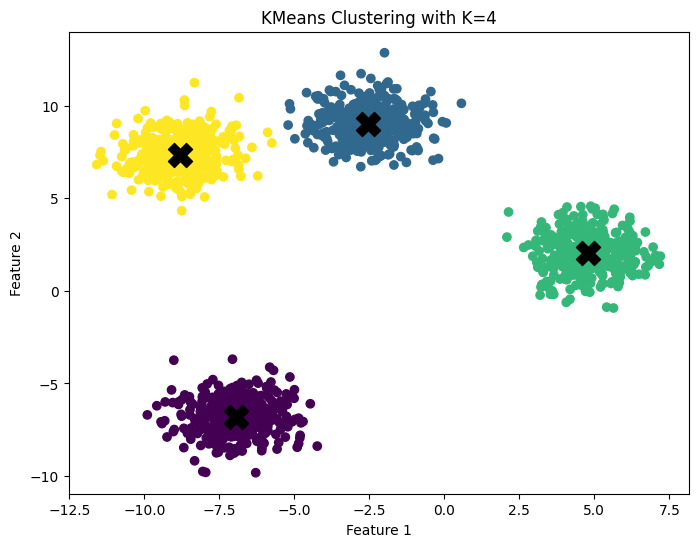

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate some example data
n_samples = 1500
n_features = 2
random_state = 42
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=4, random_state=random_state)

start_time = time.time()
# Run KMeans for a range of cluster counts
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")
# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose the number of clusters based on the elbow point
chosen_clusters = 4  # Choose the number of clusters based on the elbow point

# Perform KMeans clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=chosen_clusters, random_state=random_state)
cluster_labels = kmeans.fit_predict(X)

# Plot the clustered data points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', marker='X')
plt.title(f'KMeans Clustering with K={chosen_clusters}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


/Users/wongdowling/opt/anaconda3/envs/dq/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/wongdowling/opt/anaconda3/envs/dq/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/wongdowling/opt/anaconda3/envs/dq/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/wongdowling/opt/anaconda3/envs/dq/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

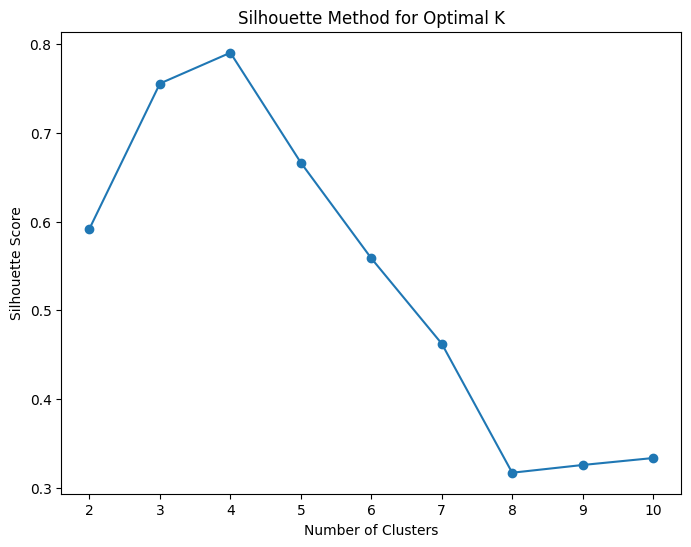

Elapsed time: 0.9282 seconds


/Users/wongdowling/opt/anaconda3/envs/dq/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


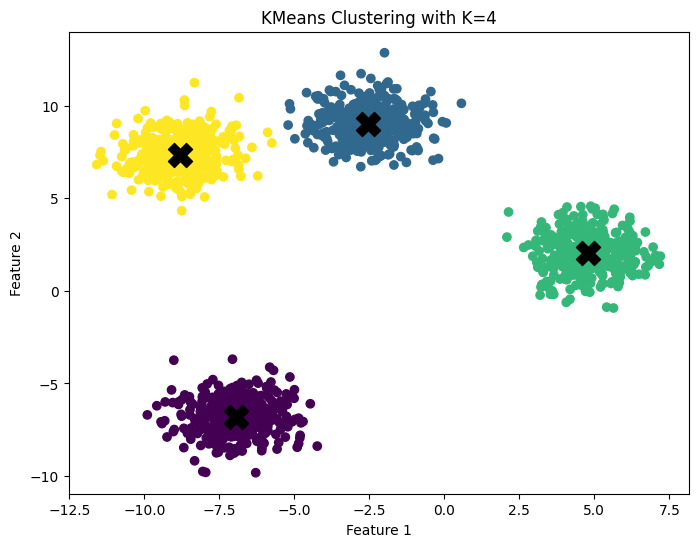

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Generate some example data
n_samples = 1500
n_features = 2
random_state = 42
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=4, random_state=random_state)

start_time = time.time()
# Calculate silhouette scores for different cluster counts
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

# Plot the Silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Choose the number of clusters based on the maximum silhouette score
chosen_clusters = np.argmax(silhouette_scores) + 2  # Add 2 because range started from 2
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")
# Perform KMeans clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=chosen_clusters, random_state=random_state)
cluster_labels = kmeans.fit_predict(X)

# Plot the clustered data points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', marker='X')
plt.title(f'KMeans Clustering with K={chosen_clusters}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
